<a href="https://colab.research.google.com/github/ua-datalab/MLWorkshops/blob/main/RL_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use of OpenAI Gym

https://gymnasium.farama.org/index.html

Updated: 03-14-2024


In [1]:
# SWIG is a software development tool that connects programs written in C and C++ with a variety of high-level programming languages.
!pip install -q swig --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.1 MB/s eta 0:00:00


In [2]:
# In colab please uncomment this to install Atari
# Box2d is a 2D physics engine.
!pip install box2d-py --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# And for visualization on Colab install
!pip install pyglet --quiet
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.8/876.8 kB 4.9 MB/s eta 0:00:00


In [13]:
import gym

In [14]:
# install dependencies
# Xvfb or X virtual framebuffer is a display server implementing the X11 display server protocol.
!apt install xvfb -qq 2>/dev/null >/dev/null;

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display as ipythondisplay  ## Needed on colab
from IPython.display import YouTubeVideo

In [16]:
## Need to set a virtual Display on colab, else ipythondisplay would not work
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

# Lunar Lander

https://gymnasium.farama.org/environments/box2d/lunar_lander/





[Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

<img src="https://gymnasium.farama.org/_images/lunar_lander.gif" width=300>

**Action Space**

There are four discrete actions available:
* 0: do nothing
* 1: fire left orientation engine
* 2: fire main engine
* 3: fire right orientation engine

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each step, the reward:
* is increased/decreased the closer/further the lander is to the landing pad.
* is increased/decreased the slower/faster the lander is moving.
* is decreased the more the lander is tilted (angle not horizontal).
* is increased by 10 points for each leg that is in contact with the ground.
* is decreased by 0.03 points each frame a side engine is firing.
* is decreased by 0.3 points each frame the main engine is firing.

The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

An episode is considered a solution if it scores at least 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

1. the lander crashes (the lander body gets in contact with the moon);
1.  the lander gets outside of the viewport (x coordinate is greater than 1);
1.  the lander is not awake. From the Box2D docs, a body that is not awake is a body which doesn’t move and doesn’t collide with any other body:

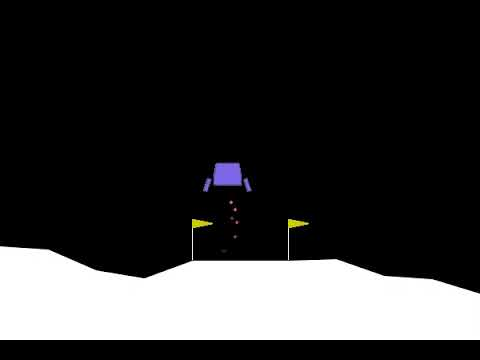

In [16]:
# Lunar Lander Video
YouTubeVideo('nQxmDH3mdCY')

In [2]:
# https://pypi.org/project/gymnasium/
# A standard API for reinforcement learning and a diverse set of reference environments (formerly Gym).
#!pip install gymnasium --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.6 MB/s eta 0:00:00


In [7]:
# https://pypi.org/project/swig/
# SWIG is a software development tool that connects programs written in C and C++ with a variety of high-level programming languages.
#!pip install -q swig --quiet

In [19]:
# https://gymnasium.farama.org/environments/box2d/

!pip install gymnasium[box2d] --quiet

In [20]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

**NOTE**: The code involves the following Python files:

1. [agent_class.py](https://github.com/ua-datalab/MLWorkshops/blob/main/ReinforcementLearning/agent_class.py)

2. [run_agent.py](https://github.com/ua-datalab/MLWorkshops/blob/main/ReinforcementLearning/run_agent.py)

that need to be uploaded to your Google Colab Notebook.


In [22]:
# agent_class.py: In this python file the agent class is implemented, which uses both for training an agent
# and acting with the trained agent
%load /content/agent_class.py

In [21]:
# run_agent.py: In this python script we run episodes for an already trained agent,
# and save statistics (duration of episodes, return for each episode) to the disk
%load /content/run_agent.py


In [23]:
import agent_class as agent

## Initialize environment and agent

In [10]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v2')

# We need to know the dimensionality of the state space, as well as how many
# actions are possible
N_actions = env.action_space.n
observation = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 2
number of actions = 4


In [11]:
# We create an instance of the agent class.
# At initialization, we need to provide
# - the dimensionality of the state space, as well as
# - the number of possible actions

parameters = {'N_state':N_state, 'N_actions':N_actions}

my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
# my_agent = agent.actor_critic(parameters=parameters)

## Train agent

In [17]:
# We train the agent on the LunarLander-v2 environment.
# Setting verbose=True allows us to follow the progress of the training

training_results = my_agent.train(environment=env,
                                verbose=True)

# CAUTION: This may take around 7 min of CPU to train.

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |     -259.035    |       -441.710      |      -189.628      |
|     200 |       13.812    |       -293.894      |      -128.022      |
|     300 |     -131.906    |       -222.052      |      -107.877      |
|     400 |      -55.427    |       -129.523      |       -57.195      |
|     500 |      -32.763    |        -87.240      |       -10.657      |
|     600 |        8.070    |       -121.343      |       -39.287      |
|     700 |      214.726    |       -165.567      |       125.915      |
|     800 |      216.102    |          3.407      |       193.743      |
|     900 |       11.541    |       -125.503      |       154.430      |
|    1000 |      296.359    |         37.634      |       220.422      |
|    1086 |      252.005    |        221.221      |

In [18]:
# the method my_agent.train() from the previous cell returns a dictionary
# with training stats, namely:
# - duration of each episode during training,
# - return of each episode during training
# - the total number of training epochs at the end of each episode
# - the total number of steps simulated at the end of each episode

training_results.keys()

dict_keys(['episode_durations', 'epsiode_returns', 'n_training_epochs', 'n_steps_simulated', 'training_completed'])

## Plotting training stats

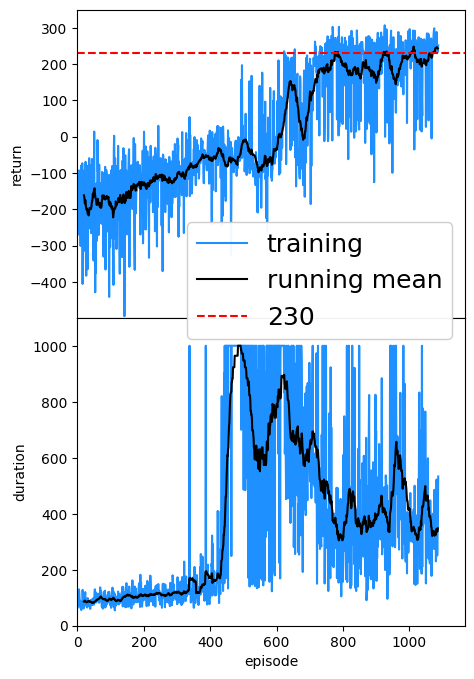

In [19]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out

def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale,
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

## Create gameplay video using trained agent



In [20]:
# There is the issue that the game window freezes when running gym games
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [21]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v2',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

env.close()

# Will take about 3 min to compute

Run 1: duration = 1000, total return = 121.591
Run 2: duration = 300, total return = 193.627
Run 3: duration = 272, total return = 272.988
Run 4: duration = 526, total return = 240.319
Run 5: duration = 561, total return = 216.585
Run 6: duration = 583, total return = 211.014
Run 7: duration = 233, total return = 226.104
Run 8: duration = 294, total return = 285.561
Run 9: duration = 1000, total return = 103.368
Run 10: duration = 331, total return = 208.273
Run 11: duration = 282, total return = 221.551
Run 12: duration = 298, total return = 286.791
Run 13: duration = 259, total return = 250.817
Run 14: duration = 241, total return = 254.975
Run 15: duration = 255, total return = 241.359
Run 16: duration = 271, total return = 241.646
Run 17: duration = 269, total return = 304.564
Run 18: duration = 308, total return = 207.305
Run 19: duration = 245, total return = 235.626
Run 20: duration = 271, total return = 217.618


We create a video file containing 20 games played by the agent

In [22]:
from gymnasium.wrappers.monitoring import video_recorder

env = gym.make('LunarLander-v2', render_mode="rgb_array")
video = video_recorder.VideoRecorder(env, './video.mp4'.format())

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        video.capture_frame()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

video.close()
env.close()

Run 1: duration = 200, total return = 263.128
Run 2: duration = 222, total return = 192.925
Run 3: duration = 300, total return = 223.428
Run 4: duration = 242, total return = 201.187
Run 5: duration = 274, total return = 238.246
Run 6: duration = 209, total return = 223.665
Run 7: duration = 272, total return = 222.153
Run 8: duration = 349, total return = 219.602
Run 9: duration = 284, total return = 199.171
Run 10: duration = 233, total return = 239.403
Run 11: duration = 243, total return = 221.392
Run 12: duration = 216, total return = 249.637
Run 13: duration = 250, total return = 224.932
Run 14: duration = 379, total return = 249.629
Run 15: duration = 159, total return =  39.242
Run 16: duration = 279, total return = 223.143
Run 17: duration = 247, total return = 202.739
Run 18: duration = 304, total return = 208.336
Run 19: duration = 187, total return =  25.211
Run 20: duration = 173, total return =  40.730
Moviepy - Building video ./video.mp4.
Moviepy - Writing video ./video

Moviepy - Done !
Moviepy - video ready ./video.mp4


Please download the video file "video.mp4" to see the lunar lander descending on the surface of the moon.

# CartPole

<img src="https://gymnasium.farama.org/_images/cart_pole.gif" width=300>

**Action Space**

The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

* 0: Push cart to the left

* 1: Push cart to the right

Note: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

**Observation Space**

The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

| Num | Observation | Min | Max |
| :--: | :--: | :--: | :--: |
| 0 | Cart Position | -4.8 | 4.8 |
| 1 | Cart Velocity | -Inf | Inf |
| 2 | Pole Angle | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3 | Pole Angular Velocity | -Inf | Inf |

**Note**: While the ranges above denote the possible values for the observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

* The cart x-position (index 0) can be take values between (-4.8, 4.8), but the episode terminates if the cart leaves the (-2.4, 2.4) range.

* The pole angle can be observed between (-.418, .418) radians (or ±24°), but the episode terminates if the pole angle is not in the range (-.2095, .2095) (or ±12°)

**Rewards**

Since the goal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The threshold for rewards is 500 for v1 and 200 for v0.

**Starting State**

All observations are assigned a uniformly random value in (-0.05, 0.05)

**Episode End**

The episode ends if any one of the following occurs:

1. Termination: Pole Angle is greater than ±12°

2. Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)

3. Truncation: Episode length is greater than 500 (200 for v0)



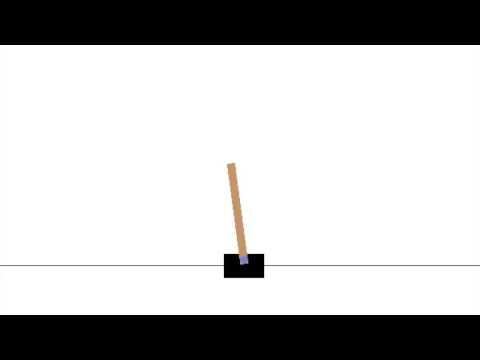

In [23]:
# Cartpole Video
YouTubeVideo('46wjA6dqxOM')

In [1]:
# Install packages
import gym
import copy
import torch
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
import math
import torchvision.transforms as T
import numpy as np

import time

## Environment

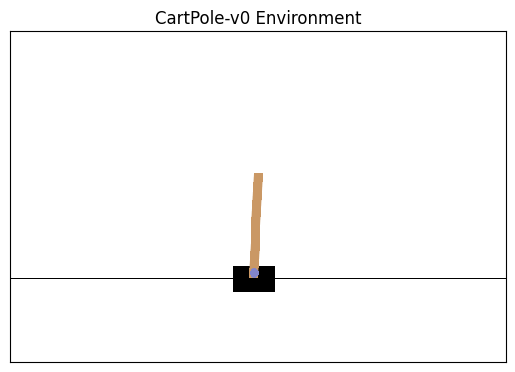

In [3]:
# Demonstration
env = gym.envs.make("CartPole-v1")


def get_screen():
    ''' Extract one step of the simulation.'''
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255.
    return torch.from_numpy(screen)

# Speify the number of simulation steps
num_steps = 2

# Show several steps
for i in range(num_steps):
    clear_output(wait=True)
    env.reset()
    plt.figure()
    plt.imshow(get_screen().cpu().permute(1, 2, 0).numpy(),
               interpolation='none')
    plt.title('CartPole-v0 Environment')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Plotting function

In [4]:
def plot_res(values, title=''):
    ''' Plot the reward curve and histogram of results over time.'''
    # Update the window after each episode
    clear_output(wait=True)

    # Define the figure
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    f.suptitle(title)
    ax[0].plot(values, label='score per run')
    ax[0].axhline(195, c='red',ls='--', label='goal')
    ax[0].set_xlabel('Episodes')
    ax[0].set_ylabel('Reward')
    x = range(len(values))
    ax[0].legend()
    # Calculate the trend
    try:
        z = np.polyfit(x, values, 1)
        p = np.poly1d(z)
        ax[0].plot(x,p(x),"--", label='trend')
    except:
        print('')

    # Plot the histogram of results
    ax[1].hist(values[-50:])
    ax[1].axvline(195, c='red', label='goal')
    ax[1].set_xlabel('Scores per Last 50 Episodes')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()
    plt.show()

## Random search

The action is sampled randomly from the action space.

In [5]:
def random_search(env, episodes,
                  title='Random Strategy'):
    """ Random search strategy implementation."""
    final = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total = 0
        while not done:
            # Sample random actions
            action = env.action_space.sample()
            # Take action and extract results
            next_state, reward, done, _ = env.step(action)
            # Update reward
            total += reward
            if done:
                break
        # Add to the final reward
        final.append(total)
        plot_res(final,title)
    return final

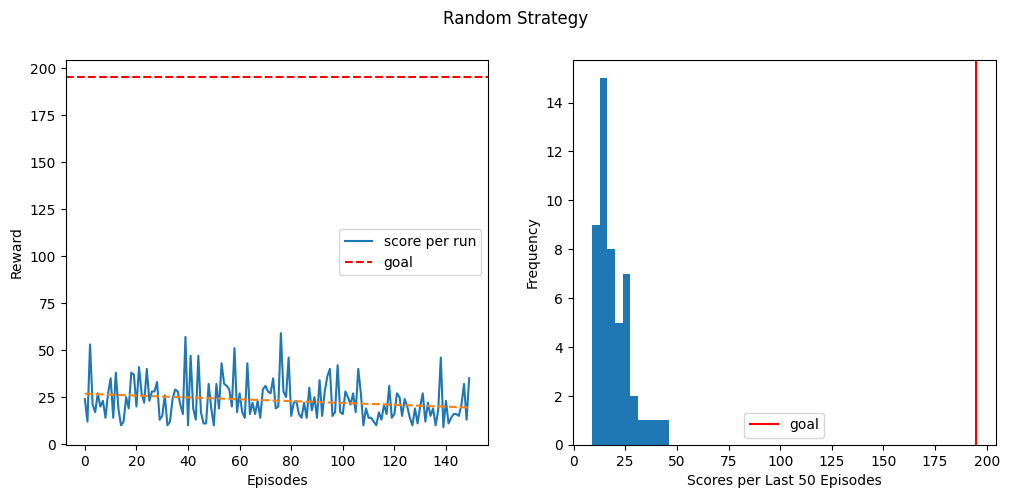

In [10]:
# Get random search results
episodes = 150
random_s = random_search(env, episodes)

## Deep Q Learning

In [7]:
class DQN():
    ''' Deep Q Neural Network class. '''
    def __init__(self, state_dim, action_dim, hidden_dim=64, lr=0.05):
            self.criterion = torch.nn.MSELoss()
            self.model = torch.nn.Sequential(
                            torch.nn.Linear(state_dim, hidden_dim),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(hidden_dim, hidden_dim*2),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(hidden_dim*2, action_dim)
                    )
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr)



    def update(self, state, y):
        """Update the weights of the network given a training sample. """
        y_pred = self.model(torch.Tensor(state))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


    def predict(self, state):
        """ Compute Q values for all actions using the DQL. """
        with torch.no_grad():
            return self.model(torch.Tensor(state))

In [8]:
def q_learning(env, model, episodes, gamma=0.9,
               epsilon=0.3, eps_decay=0.99,
               replay=False, replay_size=20,
               title = 'DQL', double=False,
               n_update=10, soft=False, verbose=True):
    """Deep Q Learning algorithm using the DQN. """
    final = []
    memory = []
    episode_i=0
    sum_total_replay_time=0
    for episode in range(episodes):
        episode_i+=1
        if double and not soft:
            # Update target network every n_update steps
            if episode % n_update == 0:
                model.target_update()
        if double and soft:
            model.target_update()

        # Reset state
        state = env.reset()
        done = False
        total = 0

        while not done:
            # Implement greedy search policy to explore the state space
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                q_values = model.predict(state)
                action = torch.argmax(q_values).item()

            # Take action and add reward to total
            next_state, reward, done, _ = env.step(action)

            # Update total and memory
            total += reward
            memory.append((state, action, next_state, reward, done))
            q_values = model.predict(state).tolist()

            if done:
                if not replay:
                    q_values[action] = reward
                    # Update network weights
                    model.update(state, q_values)
                break

            if replay:
                t0=time.time()
                # Update network weights using replay memory
                model.replay(memory, replay_size, gamma)
                t1=time.time()
                sum_total_replay_time+=(t1-t0)
            else:
                # Update network weights using the last step only
                q_values_next = model.predict(next_state)
                q_values[action] = reward + gamma * torch.max(q_values_next).item()
                model.update(state, q_values)

            state = next_state

        # Update epsilon
        epsilon = max(epsilon * eps_decay, 0.01)
        final.append(total)
        plot_res(final, title)

        if verbose:
            print("episode: {}, total reward: {}".format(episode_i, total))
            if replay:
                print("Average replay time:", sum_total_replay_time/episode_i)

    return final

### Parameters

In [9]:
# Number of states
n_state = env.observation_space.shape[0]
# Number of actions
n_action = env.action_space.n
# Number of episodes
episodes = 150
# Number of hidden nodes in the DQN
n_hidden = 50
# Learning rate
lr = 0.001

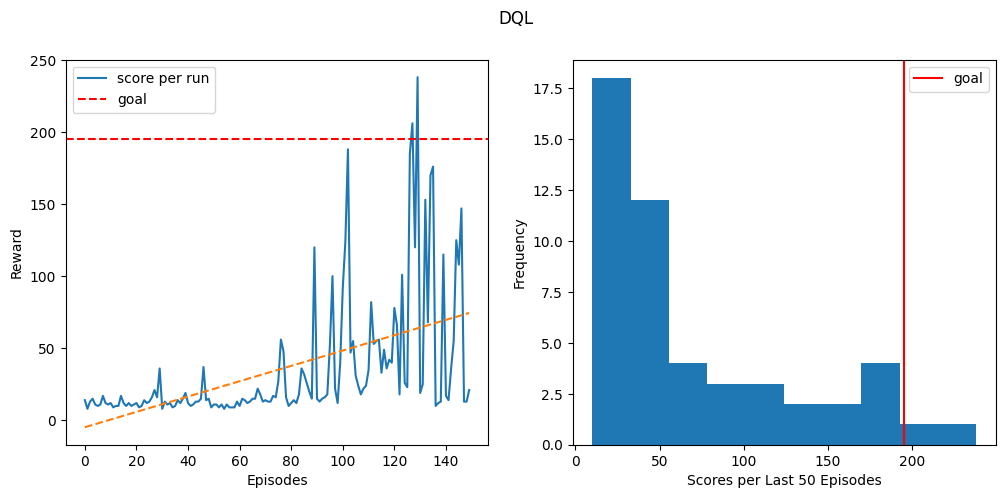

episode: 150, total reward: 21.0


In [11]:
# Get DQN results
simple_dqn = DQN(n_state, n_action, n_hidden, lr)
simple = q_learning(env, simple_dqn, episodes, gamma=.9, epsilon=0.3)

## Replay
Experience replay stores the agent's experiences in memory.

In [12]:
# Expand DQL class with a replay function.
class DQN_replay(DQN):
    #old replay function
    #def replay(self, memory, size, gamma=0.9):
        #""" Add experience replay to the DQN network class. """
        # Make sure the memory is big enough
        #if len(memory) >= size:
            #states = []
            #targets = []
            # Sample a batch of experiences from the agent's memory
            #batch = random.sample(memory, size)

            # Extract information from the data
            #for state, action, next_state, reward, done in batch:
                #states.append(state)
                # Predict q_values
                #q_values = self.predict(state).tolist()
                #if done:
                    #q_values[action] = reward
                #else:
                    #q_values_next = self.predict(next_state)
                    #q_values[action] = reward + gamma * torch.max(q_values_next).item()

                #targets.append(q_values)

            #self.update(states, targets)

    #new replay function
    def replay(self, memory, size, gamma=0.9):
        """New replay function"""
        #Try to improve replay speed
        if len(memory)>=size:
            batch = random.sample(memory,size)
            batch_t = list(map(list, zip(*batch))) #Transpose batch list
            states = batch_t[0]
            actions = batch_t[1]
            next_states = batch_t[2]
            rewards = batch_t[3]
            is_dones = batch_t[4]

            states = torch.Tensor(states)
            actions_tensor = torch.Tensor(actions)
            next_states = torch.Tensor(next_states)
            rewards = torch.Tensor(rewards)
            is_dones_tensor = torch.Tensor(is_dones)

            is_dones_indices = torch.where(is_dones_tensor==True)[0]

            all_q_values = self.model(states) # predicted q_values of all states
            all_q_values_next = self.model(next_states)
            #Update q values
            all_q_values[range(len(all_q_values)),actions]=rewards+gamma*torch.max(all_q_values_next, axis=1).values
            all_q_values[is_dones_indices.tolist(), actions_tensor[is_dones].tolist()]=rewards[is_dones_indices.tolist()]


            self.update(states.tolist(), all_q_values.tolist())

### Replay using old replay function


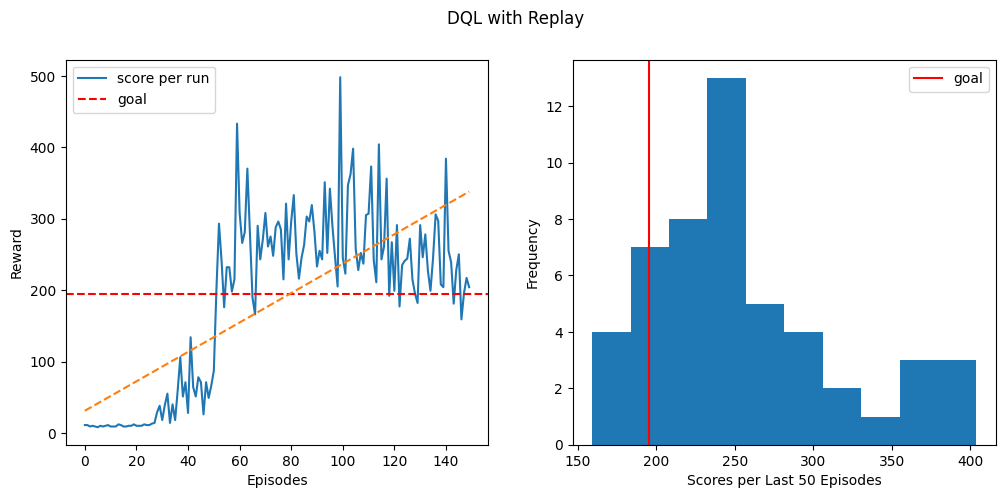

episode: 150, total reward: 204.0
Average replay time: 0.5284499899546306


In [13]:
# Get replay results
dqn_replay = DQN_replay(n_state, n_action, n_hidden, lr)
replay = q_learning(env, dqn_replay,
                    episodes, gamma=.9,
                    epsilon=0.2, replay=True,
                    title='DQL with Replay')

## replay using the new replay function

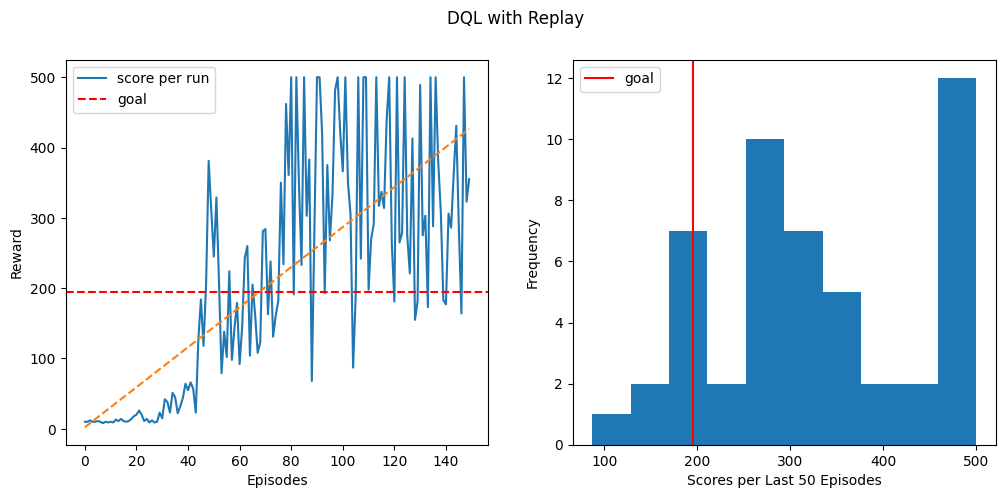

episode: 150, total reward: 355.0
Average replay time: 0.5840983549753825


In [14]:
# Get replay results
dqn_replay = DQN_replay(n_state, n_action, n_hidden, lr)
replay = q_learning(env, dqn_replay,
                    episodes, gamma=.9,
                    epsilon=0.2, replay=True,
                    title='DQL with Replay')

## Double Q Learning

Traditional Deep Q Learning leads to overestimating the reward, which leads to unstable trainig and lower quality policy. The Q values do not have equal weights and are only updated after a certain number of episodes.  

In [15]:
class DQN_double(DQN):
    def __init__(self, state_dim, action_dim, hidden_dim, lr):
        super().__init__(state_dim, action_dim, hidden_dim, lr)
        self.target = copy.deepcopy(self.model)

    def target_predict(self, s):
        ''' Use target network to make predicitons.'''
        with torch.no_grad():
            return self.target(torch.Tensor(s))

    def target_update(self):
        ''' Update target network with the model weights.'''
        self.target.load_state_dict(self.model.state_dict())

    def replay(self, memory, size, gamma=1.0):
        ''' Add experience replay to the DQL network class.'''
        if len(memory) >= size:
            # Sample experiences from the agent's memory
            data = random.sample(memory, size)
            states = []
            targets = []
            # Extract datapoints from the data
            for state, action, next_state, reward, done in data:
                states.append(state)
                q_values = self.predict(state).tolist()
                if done:
                    q_values[action] = reward
                else:
                    # The only difference between the simple replay is in this line
                    # It ensures that next q values are predicted with the target network.
                    q_values_next = self.target_predict(next_state)
                    q_values[action] = reward + gamma * torch.max(q_values_next).item()

                targets.append(q_values)

            self.update(states, targets)

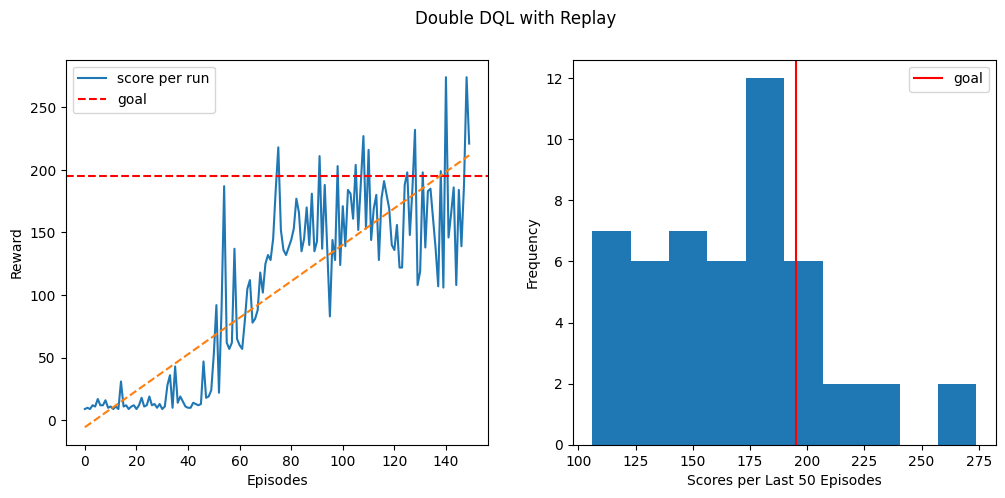

episode: 150, total reward: 221.0
Average replay time: 0.7048502683639526


In [16]:
# Get replay results
dqn_double = DQN_double(n_state, n_action, n_hidden, lr)
double =  q_learning(env, dqn_double, episodes, gamma=.9,
                    epsilon=0.2, replay=True, double=True,
                    title='Double DQL with Replay', n_update=10)
